# Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Dataset Source :- 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

# Importing Libraries

In [ ]:
#importing all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder    
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
import scikitplot as skplt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
import xgboost as xgb
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.metrics import f1_score

# Loading the Dataset

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# df = pd.read_csv('Project_EDA.csv')

In [ ]:
url = 'https://drive.google.com/file/d/12d3qh4tUBVU1jqQPikT0ySBT-VtZEWry/view?usp=sharing'
path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
#displaying the head of the dataset
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

# Data Split

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3])

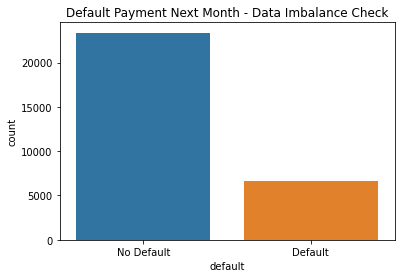

In [ ]:
#Checking the Imbalance
df['default'].value_counts()
plt.title('Default Payment Next Month - Data Imbalance Check')
ax1 = sns.countplot(x='default', data = df)
ax1.set_xticklabels(['No Default','Default'])
plt.show()

In [ ]:
y = df['default']

In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [ ]:
X = df.drop('default', axis=1)

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


**Train Test Split**

In [ ]:
X_train_1, X_test_1, y_train_1, y_test=train_test_split(X, y, random_state=2, test_size=0.20)

# Applying the MinMax Scaler and SMOTE:

- Transformation to normalize values ( If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.)

### Distribution of all Variables after applying MinMax Scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# normal_scaling = MinMaxScaler()
# X_train_2 = normal_scaling.fit_transform(X_train_1)
# X_train_2
#Normalize Train data
minmax_scale = preprocessing.MinMaxScaler().fit(X_train_1)
X_train_2 = minmax_scale.transform(X_train_1)
X_train_2 = pd.DataFrame(X_train_2, columns= list(X_train_1))


In [ ]:
#Normalize test data
minmax_scale = preprocessing.MinMaxScaler().fit(X_test_1)
X_test = minmax_scale.transform(X_test_1)
X_test = pd.DataFrame(X_test, columns= list(X_test_1))
# X_test.hist(figsize=(20,20))
# plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_1 == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_1 == 0)))

sm = SMOTE(random_state = 2)

#X_train, y_train = sm.fit_resample(X_train_2, y_train_1.ravel())
X_train, y_train = sm.fit_resample(X_train_2, y_train_1)
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 5301
Before OverSampling, counts of label '0': 18699 

After OverSampling, the shape of train_X: (37398, 23)
After OverSampling, the shape of train_y: (37398,) 

After OverSampling, counts of label '1': 18699
After OverSampling, counts of label '0': 18699


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  6000 non-null   float64
 1   SEX        6000 non-null   float64
 2   EDUCATION  6000 non-null   float64
 3   MARRIAGE   6000 non-null   float64
 4   AGE        6000 non-null   float64
 5   PAY_1      6000 non-null   float64
 6   PAY_2      6000 non-null   float64
 7   PAY_3      6000 non-null   float64
 8   PAY_4      6000 non-null   float64
 9   PAY_5      6000 non-null   float64
 10  PAY_6      6000 non-null   float64
 11  BILL_AMT1  6000 non-null   float64
 12  BILL_AMT2  6000 non-null   float64
 13  BILL_AMT3  6000 non-null   float64
 14  BILL_AMT4  6000 non-null   float64
 15  BILL_AMT5  6000 non-null   float64
 16  BILL_AMT6  6000 non-null   float64
 17  PAY_AMT1   6000 non-null   float64
 18  PAY_AMT2   6000 non-null   float64
 19  PAY_AMT3   6000 non-null   float64
 20  PAY_AMT4

In [ ]:
len(y_test)

6000

In [ ]:
# Create dictionary for storing values of all models
prediction = dict()

# Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_2, y_train_1)
prediction = logreg.predict(X_test)
print("Accuaracy of Logistic Regression Model on not normalized Data : ")
a= accuracy_score(y_test, prediction)
a=a*100
print(a)

Accuaracy of Logistic Regression Model on not normalized Data : 
81.28333333333333


In [ ]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train_1, y_train_1)
prediction = logreg.predict(X_test)
print("Accuaracy of Logistic Regression Model on Imbalanced Data : ")
a= accuracy_score(y_test, prediction)
a=a*100
print(a)

Accuaracy of Logistic Regression Model on Imbalanced Data : 
77.8


Accuracy of model
78.38333333333334
F1 score:  [0.8586992  0.54023396]


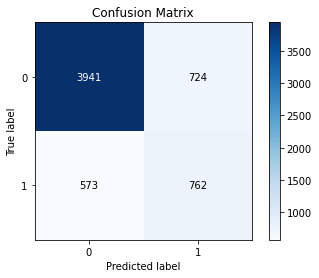

Average precision-recall score: 0.39


In [ ]:
##create an object of the class, logreg is the object of class LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

print("Accuracy of model")
a= accuracy_score(y_test, prediction)
a=a*100
print(a)

print("F1 score: ", f1_score(y_test, prediction, average=None))

skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Accuracy of model
78.38333333333334


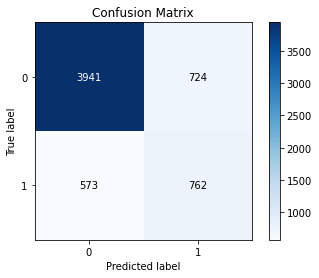

Average precision-recall score: 0.21


In [ ]:
#Gridsearch for Logistic regression
model = LogisticRegression()
grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}

grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

#Training and Prediction
grid_lr.fit(X_train, y_train)
prediction['Logistic'] = grid_lr.best_estimator_.predict(X_test)

print("Accuracy of model")
a= accuracy_score(y_test, prediction['Logistic'])
a=a*100
print(a)

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()

average_precision = average_precision_score(y_test,preds)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


In [ ]:
grid_lr.best_estimator_

LogisticRegression(C=1)

# K Nearest Neighbors

### For a data point to be classified into two different categories, We find the k nearest neighbors (k is any odd value) Then we use majority voting on the labels. The majority class label is assigned to the data point If k is even then distance is calculated. The shorted distance is used

Accuracy of model
64.88333333333334
F1 score:  [0.74635849 0.42946114]


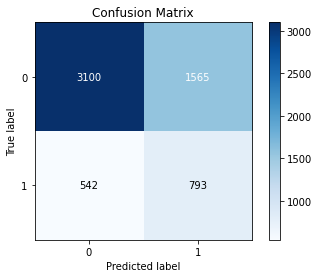

Average precision-recall score: 0.29


In [ ]:
#default parameters
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

prediction= classifier.predict(X_test)  

print("Accuracy of model")
a= accuracy_score(y_test, prediction)
a=a*100
print(a)

print("F1 score: ", f1_score(y_test, prediction, average=None))

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
accuaracy of model
69.11666666666667


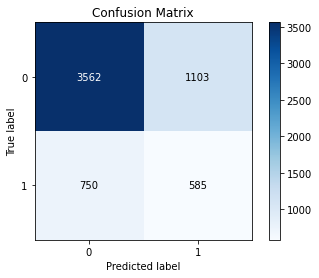

Average precision-recall score: 0.28


In [ ]:
#Grid search for KNN
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid_knn.fit(X_train, y_train)
prediction['KNN'] = grid_knn.predict(X_test)  
print("accuaracy of model")
a= accuracy_score(y_test, prediction['KNN'])
a=a*100
print(a)

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction['KNN'])
plt.show()

average_precision = average_precision_score(y_test,prediction['KNN'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

# Decision Tree Classifier

accuracy of the model
53.733333333333334
F1 score:  [0.65804385 0.28490469]


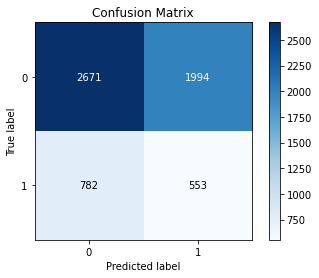

Average precision-recall score: 0.22


In [ ]:
#Calling the Decision TRee Classifier class default parameters
#clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = None,
                               #max_depth=None, min_samples_leaf=1)
clf_gini = DecisionTreeClassifier()

clf_gini.fit(X_train, y_train)

prediction = clf_gini.predict(X_test)
print("accuracy of the model")
a=accuracy_score(y_test, prediction)
a=a*100
print(a)

print("F1 score: ", f1_score(y_test, prediction, average=None))

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Fitting 3 folds for each of 294 candidates, totalling 882 fits
accuracy of the model
59.21666666666666


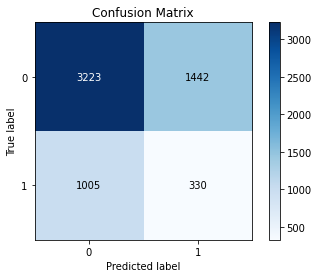

Average precision-recall score: 0.21


In [ ]:
#Grid search for Decision tree
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_dt.fit(X_train, y_train)

prediction['DT'] = grid_dt.predict(X_test)
print("Accuracy of the model")
a=accuracy_score(y_test, prediction['DT'])
a=a*100
print(a)

#print(confusion_matrix) 
skplt.metrics.plot_confusion_matrix(y_test, prediction['DT'])
plt.show()

average_precision = average_precision_score(y_test,prediction['DT'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
clf_gini_grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)

# Random Forest-- Ensemble learning , deeper Decision trees

### Particularly, trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets, i.e. have low bias, but very high variance. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance

Accuracy of the model
77.64999999999999
F1 score:  [0.87107009 0.16135084]


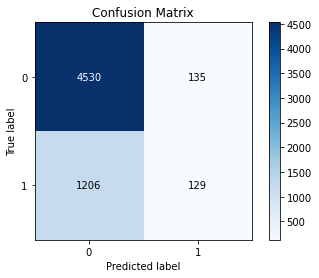

Average precision-recall score: 0.25


In [ ]:
#calling the RandomForest Classifier default parameters
# clf = RandomForestClassifier(n_jobs=1000, 
#                              random_state=9,
#                              #criterion=RFC_METRIC,
#                              n_estimators=11,
#                              verbose=False)

clf = RandomForestClassifier()

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print("Accuracy of the model")
a= accuracy_score(y_test, prediction)
a= a*100
print(a)
print("F1 score: ", f1_score(y_test, prediction, average=None))
#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Accuracy of the model
80.88333333333333


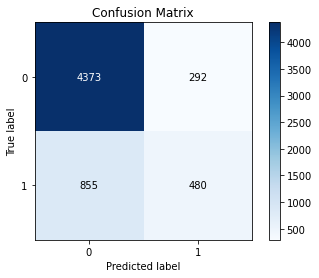

Average precision-recall score: 0.37


In [ ]:
#Grid search for Random Forest
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, cv= 5)
grid_rf.fit(X_train, y_train)

prediction['RF'] = grid_rf.predict(X_test)

print("Accuracy of the model")
a=accuracy_score(y_test, prediction['RF'])
a=a*100
print(a)

#print(confusion_matrix) 
skplt.metrics.plot_confusion_matrix(y_test, prediction['RF'])
plt.show()

average_precision = average_precision_score(y_test,prediction['RF'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

Accuracy of the model
64.91666666666667
F1 score:  [0.74187615 0.45253576]


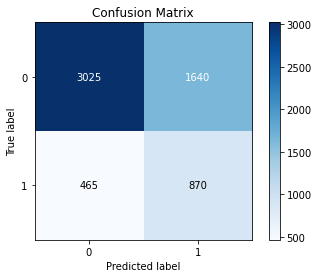

Average precision-recall score: 0.30


In [ ]:
#XGBoost default parameters
#xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=0)

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)

print("Accuracy of the model")
a= accuracy_score(y_test, prediction)
a= a*100
print(a)

print("F1 score: ", f1_score(y_test, prediction, average=None))

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction)
plt.show()

average_precision = average_precision_score(y_test,prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Accuracy of the model
35.4


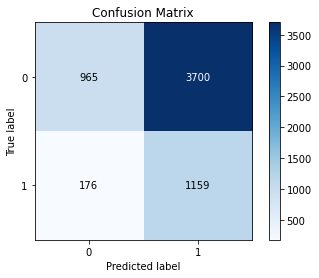

Average precision-recall score: 0.24


In [ ]:
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [3,5,6],
              'n_estimators': [50,80,150],
              'reg_alpha': [0,0.1],
              'reg_lambda': [0,0.1,1]}

grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
grid_xgb.fit(X_train, y_train)

prediction['XGB'] = grid_xgb.predict(X_test)

print("Accuracy of the model")
a=accuracy_score(y_test, prediction['XGB'])
a=a*100
print(a)

#print(confusion_matrix) 
skplt.metrics.plot_confusion_matrix(y_test, prediction['XGB'])
plt.show()

average_precision = average_precision_score(y_test,prediction['XGB'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
grid_xgb.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 150,
 'reg_alpha': 0.1,
 'reg_lambda': 0}

# AdaBoost

Accuracy of the model
60.68333333333334


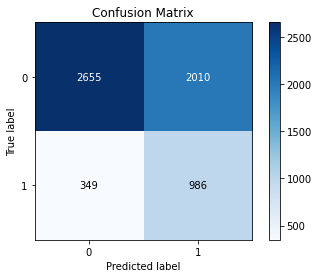

Average precision-recall score: 0.30


In [ ]:
adb_model = AdaBoostClassifier()

adb_model.fit(X_train,y_train)
prediction['adb'] = adb_model.predict(X_test)

print("Accuracy of the model")
a= accuracy_score(y_test, prediction['adb'])
a= a*100
print(a)

#print(confusion_matrix)  
skplt.metrics.plot_confusion_matrix(y_test, prediction['adb'])
plt.show()

average_precision = average_precision_score(y_test,prediction['adb'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy of the model
52.03333333333333


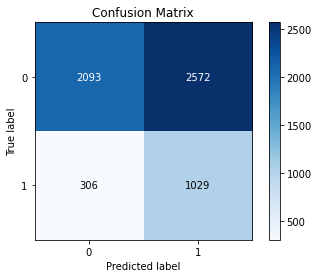

Average precision-recall score: 0.27


In [ ]:
param_grid = {'n_estimators': [10, 50, 100, 500],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

grid_adb = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
grid_adb.fit(X_train, y_train)

prediction['ADB'] = grid_adb.predict(X_test)

print("Accuracy of the model")
a=accuracy_score(y_test, prediction['ADB'])
a=a*100
print(a)

#print(confusion_matrix) 
skplt.metrics.plot_confusion_matrix(y_test, prediction['ADB'])
plt.show()

average_precision = average_precision_score(y_test,prediction['ADB'])
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
grid_adb.best_params_

{'learning_rate': 1.0, 'n_estimators': 500}